In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


**Getting the imports**

In [4]:
retailData = pd.read_csv('../archive/e-shop clothing 2008.csv')
retailData

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


**Definition of some important columns for our case study**
    
    ORDER -> sequence of clicks during one session
    
    PAGE 1 (MAIN CATEGORY) -> concerns the main product category:
        1-trousers
        2-skirts
        3-blouses
        4-sale

    MODEL PHOTOGRAPHY -> variable with two categories:
        1-en face
        2-profile
        
    PRICE -> price in US dollars

    PRICE 2 -> variable informing whether the price of a particular product is higher than
    the average price for the entire product category
        1-yes
        2-no**

In [5]:
country_map = {
    "1": "Australia",
    "2": "Austria",
    "3": "Belgium",
    "4": "British Virgin Islands",
    "5": "Cayman Islands",
    "6": "Christmas Island",
    '7': "Croatia",
    '8': "Cyprus",
    '9': "Czech Republic",
    '10': "Denmark",
    "11": "Estonia",
    "12": "unidentified",
    "13": "Faroe Islands",
    "14": "Finland",
    "15": "France",
    "16": "Germany",
    '17': "Greece",
    "18": "Hungary",
    "19": "Iceland",
    "20": "India",
    "21": "Ireland",
    "22": "Italy",
    "23": "Latvia",
    "24": "Lithuania",
    "25": "Luxembourg",
    "26": "Mexico",
    "27": "Netherlands",
    "28": "Norway",
    "29": "Poland",
    "30": "Portugal",
    "31": "Romania",
    '32': "Russia",
    '33': "San Marion",
    "34": "Slovakia",
    "35": "Slovenia",
    "36": "Spain",
    '37': "Sweden",
    "38": "Switzerland",
    "39": "Ukraine",
    "40": "United Arab Emirates",
    "41": "United Kingdom",
    "42": "USA",
    "43": "biz (.biz)",
    "44": "com (.com)",
    "45": "int (.int)",
    "46": "net (.net)",
    "47": "org (*.org)"
}

In [6]:
retailData['country'] = retailData['country'].astype("string")
retailData["country"] = retailData["country"].map(country_map)

In [7]:
page1_map = {
    1: "trousers",
    2: "skirts",
    3: "blouses",
    4: "sale"
}
retailData["page 1 (main category)"] = retailData["page 1 (main category)"].map(page1_map)

In [8]:
location_map = {
    1: "top left",
    2: "top in the middle",
    3: "top right",
    4: 'bottom left',
    5: "bottom in the middle",
    6: "bottom right"
}

retailData["location"] = retailData["location"].map(location_map)

In [9]:
color_map = {
    1: "beige",
    2: "black",
    3: "blue",
    4: "brown",
    5: "burgundy",
    6: "gray",
    7: "green",
    8: "navy blue",
    9: "of many colors",
    10: "olive",
    11: "pink",
    12: "red",
    13: "violet",
    14: "white"
}

retailData["colour"] = retailData["colour"].map(color_map)

In [10]:
model_map = {
    1: "En face",
    2: "Profile"}

retailData["model photography"] = retailData["model photography"].map(model_map)

In [11]:
month_map = {
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
}

retailData["month"] = retailData["month"].map(month_map)

In [12]:
retailData

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,April,1,1,Poland,1,trousers,A13,beige,bottom in the middle,En face,28,2,1
1,2008,April,1,2,Poland,1,trousers,A16,beige,bottom right,En face,33,2,1
2,2008,April,1,3,Poland,1,skirts,B4,olive,top in the middle,En face,52,1,1
3,2008,April,1,4,Poland,1,skirts,B17,gray,bottom right,Profile,38,2,1
4,2008,April,1,5,Poland,1,skirts,B8,brown,top right,Profile,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,August,13,1,Poland,24024,skirts,B10,black,bottom left,En face,67,1,1
165470,2008,August,13,1,Czech Republic,24025,trousers,A11,blue,bottom left,En face,62,1,1
165471,2008,August,13,1,Slovakia,24026,trousers,A2,blue,top left,En face,43,2,1
165472,2008,August,13,2,Slovakia,24026,blouses,C2,red,top left,En face,43,1,1


**The data is now ready for Visualization**

In [13]:
retailData.describe()

,year,day,order,session ID,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,14.524554,9.817476,12058.417056,43.802507,1.488167,1.710166
std,0.0,8.830374,13.478411,7008.418903,12.548131,0.499861,0.982412
min,2008.0,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,7.000000,2.000000,5931.000000,33.000000,1.000000,1.000000
50%,2008.0,14.000000,6.000000,11967.500000,43.000000,1.000000,1.000000
75%,2008.0,22.000000,12.000000,18219.000000,52.000000,2.000000,2.000000
max,2008.0,31.000000,195.000000,24026.000000,82.000000,2.000000,5.000000


**From the data summary we can see there is a huge variation in the order data [max = 195, min = 1]**


**Data visualization**

C:\Users\tannistha.ganguly\AppData\Local\Temp\ipykernel_29404\4036592396.py:9: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  plt.bar(ordersGroupedByCountry.agg(sum).sort_values(ascending=False).index, np.log(ordersGroupedByCountry.agg(sum).sort_values(ascending=False)),
C:\Users\tannistha.ganguly\AppData\Local\Temp\ipykernel_29404\4036592396.py:9: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  plt.bar(ordersGroupedByCountry.agg(sum).sort_values(ascending=False).index, np.log(ordersGroupedByCountry.agg(sum).sort_values(ascending=False)),


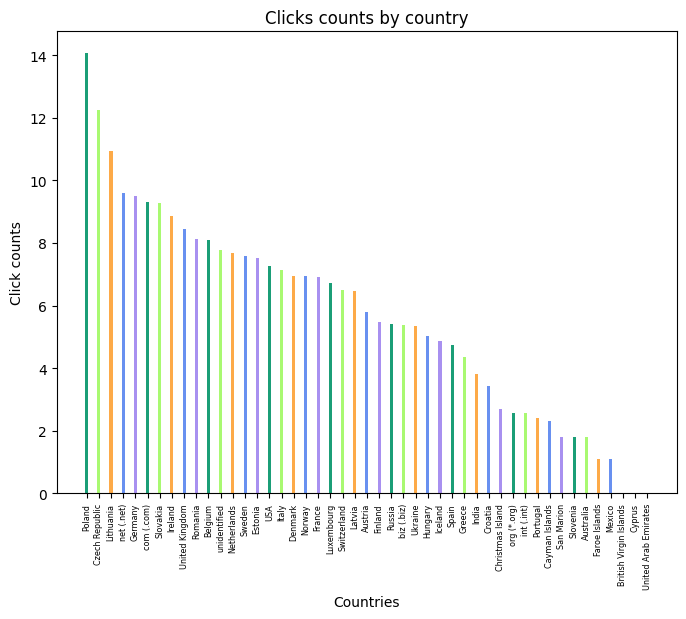

In [14]:
#$1. Which country the sales is highest/lowest?
ordersGroupedByCountry = retailData.groupby('country')['order']

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']

plt.figure()
plt.bar(ordersGroupedByCountry.agg(sum).sort_values(ascending=False).index, np.log(ordersGroupedByCountry.agg(sum).sort_values(ascending=False)), 
        color=colors, width=0.25)
plt.xticks(rotation=90, fontsize = 'xx-small')
plt.xlabel('Countries')
plt.ylabel('Click counts')
plt.title('Clicks counts by country')
plt.show()

**As we already noticed that order count has a huge variation, this bar chart reaffirms that conclusion. This could indicate less data availability for non European countries. However, as per the given data Poland has the highest click counts followed by Czech Republic and Lithuania.**

In [15]:
import plotly.express as px
colorGroupByCategory = retailData.groupby(by=["page 1 (main category)", "colour"]).size().reset_index(name="counts")
fig = px.scatter(colorGroupByCategory, x="page 1 (main category)", y="counts",
                 color='colour', size='counts', size_max=30, title="Which colors of clothing are more preferred by category?")
fig.show()


**The above scatterplot distinctly shows that blue trouser is the most preferred item for the customers.**

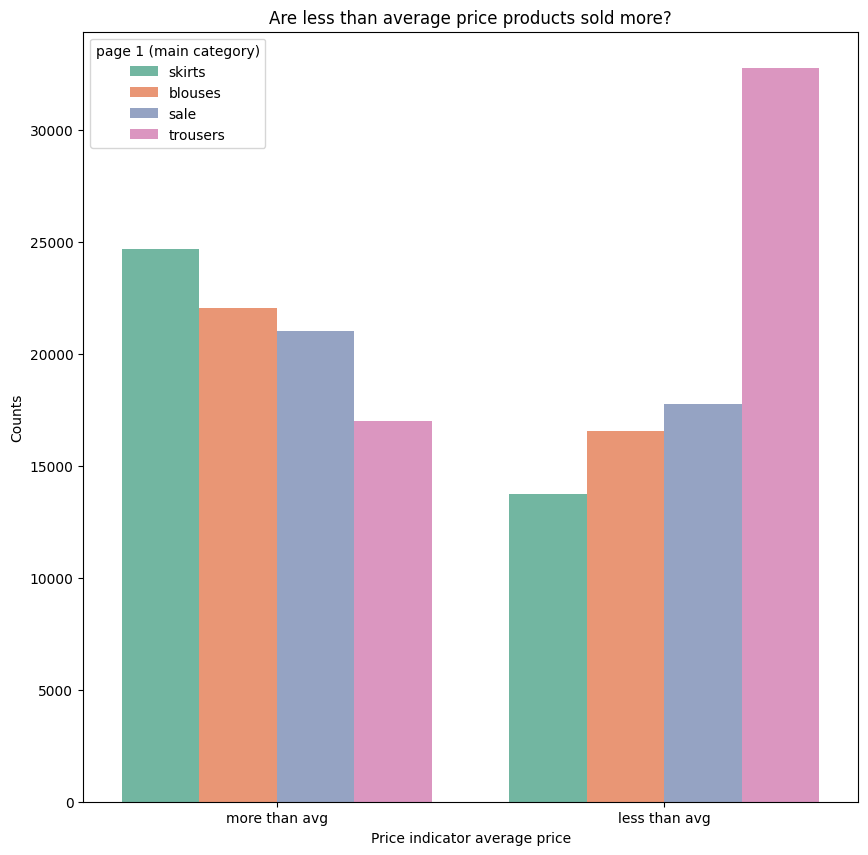

In [16]:
#Do users prefer below or above average products?

cols= ["#C2C4E2","#EED4E5"]
plt.figure(figsize=(10,10))
g_q1 = sns.countplot(x= retailData['price 2'], palette = 'Set2', hue=retailData["page 1 (main category)"])
g_q1.set(xlabel='Price indicator average price', ylabel='Counts')
g_q1.set_xticks([0, 1])
g_q1.set_xticklabels(labels=['more than avg', 'less than avg'])
plt.title("Are less than average price products sold more?")
plt.show()

**So we can conclude that while for skirts, blouses and sales above average priced products are preferred, trousers that sell more are below average priced.**

C:\Users\tannistha.ganguly\AppData\Local\Temp\ipykernel_29404\539131256.py:8: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



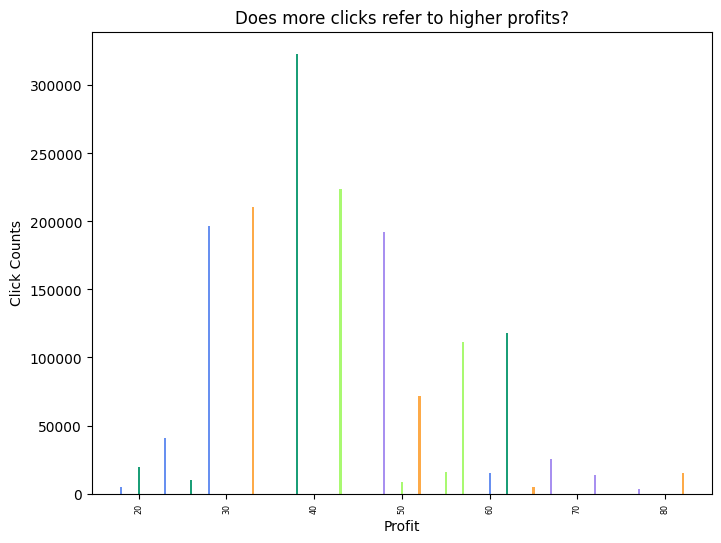

In [17]:
ordersGroupedByPrice = retailData.groupby('price')['order']

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']

plt.figure()
plt.bar(ordersGroupedByPrice.agg(sum).sort_values(ascending=False).index, ordersGroupedByPrice.agg(sum).sort_values(ascending=False), color=colors, width=0.25)
plt.xticks(rotation=90, fontsize = 'xx-small')
plt.xlabel('Profit')
plt.ylabel('Click Counts')
plt.title('Does more clicks refer to higher profits?')
plt.show()


**This establishes that higher clicks do not necessarily indicate higher profits.**

In [18]:
pageWiseCategories = retailData.groupby(by=["page", "page 1 (main category)"]).size().reset_index(name="counts")

px.bar(data_frame=pageWiseCategories, x="page", y="counts",
       color="page 1 (main category)", barmode="group", title="Page wise sell of product categories")

**This indicates that while Page 1 has the highest clicks, Page 5 is only relevant for sale items**

In [19]:
#Should we put model photography in the face of the product or in the inside the profile ?
df5 = retailData.groupby(by=["model photography", 'page 1 (main category)'])[
    'price'].count().reset_index(name="counts")
px.bar(data_frame=df5, x="model photography", y="counts",
       color="page 1 (main category)", barmode="group")

**We can safely conclude that model photography in the face of the product is more preferred by users.**


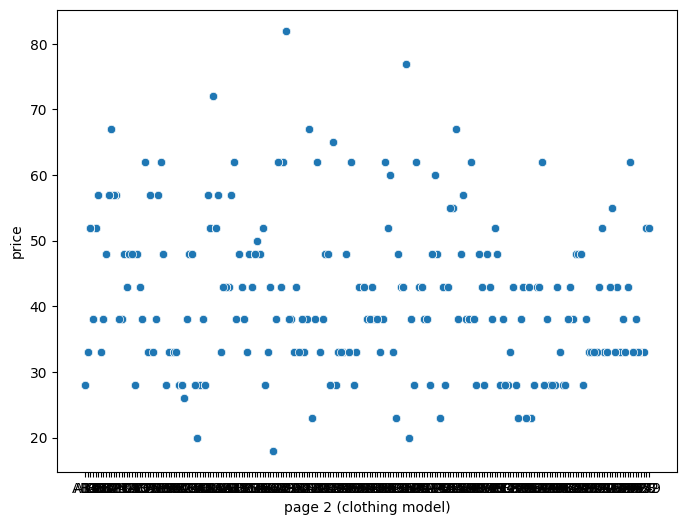

In [23]:
# pairplot with hue category
sns.scatterplot(x='page 2 (clothing model)', y='price', data=retailData)
# to show
plt.show()

**Summary of insights from Data visualization:**

1. Poland has the highest click counts followed by Czech Republic and Lithuania.
2. Blue trouser is the most preferred item for the customers.
3. While for skirts, blouses and sales, above-average priced products are preferred, trousers that sell more are below-average priced.
4. Higher clicks do not necessarily indicate higher profits.
5. Page 1 has the highest clicks, Page 5 is only relevant for sale items.
6. Model photography in the face of the product is more preferred by users.

**Modeling starts**

In [26]:
modelingInput = pd.read_csv('../archive/e-shop clothing 2008.csv')
modelingInput

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


In [27]:
modelingInput['page 2 (clothing model)'] = modelingInput['page 2 (clothing model)'].astype('category')
modelingInput['page 2 (clothing model)'] = modelingInput['page 2 (clothing model)'].cat.codes
modelingInput

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,4,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,7,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,70,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,51,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,74,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,44,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,2,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,11,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,87,12,1,1,43,1,1


In [28]:
modelingInput.isnull().sum()

year                       0
month                      0
day                        0
order                      0
country                    0
session ID                 0
page 1 (main category)     0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
price                      0
price 2                    0
page                       0
dtype: int64

In [29]:
modelingInput = modelingInput.dropna()
modelingInput

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,4,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,7,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,70,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,51,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,74,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,44,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,2,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,11,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,87,12,1,1,43,1,1


**Looks like no data cleaning is required, but will drop the columns sessionID and year as these are not useful columns**

In [30]:
modelingInput=modelingInput.drop(['session ID','year'],axis=1)

In [31]:
modelingInput['price 2'] = modelingInput['price 2'].map({1:1, 2:0})
modelingInput

,month,day,order,country,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,4,1,1,29,1,4,1,5,1,28,0,1
1,4,1,2,29,1,7,1,6,1,33,0,1
2,4,1,3,29,2,70,10,2,1,52,1,1
3,4,1,4,29,2,51,6,6,2,38,0,1
4,4,1,5,29,2,74,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
165469,8,13,1,29,2,44,2,4,1,67,1,1
165470,8,13,1,9,1,2,3,4,1,62,1,1
165471,8,13,1,34,1,11,3,1,1,43,0,1
165472,8,13,2,34,3,87,12,1,1,43,1,1


**Mapping the price 2 column to 1 and 0 values for binary classification**

**As part of our modeling, we will use Logistic Regression to predict the value of binary column 'price 2'. The model will predict the price indicator where it is above or below average.**

In [46]:
X1 = modelingInput.drop(columns=['price', 'price 2'])

In [47]:
y1 = modelingInput['price 2']


In [48]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test =train_test_split(X1, y1, test_size=0.3, random_state=5)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test) #not fit_transform here

from sklearn.linear_model import LogisticRegression
log_reg1 = LogisticRegression(random_state=5).fit(X1_train_scaled, y1_train)
log_reg1.predict(X1_train_scaled)

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [49]:
print("Accuracy of logistic regression classifier on train set ", log_reg1.score(X1_train_scaled, y1_train)*100)
print("Accuracy of logistic regression classifier on test set ", log_reg1.score(X1_test_scaled, y1_test)*100)

Accuracy of logistic regression classifier on train set  56.56344156572938
Accuracy of logistic regression classifier on test set  56.39062909171484


In [50]:
from sklearn.metrics import confusion_matrix, classification_report
y1_pred = log_reg1.predict(X1_test_scaled)
confusion_matrix1 = confusion_matrix(y1_test, y1_pred)
print(confusion_matrix1)
print(classification_report(y1_test,y1_pred))

[[13419 10594]
 [11055 14575]]
              precision    recall  f1-score   support

           0       0.55      0.56      0.55     24013
           1       0.58      0.57      0.57     25630

    accuracy                           0.56     49643
   macro avg       0.56      0.56      0.56     49643
weighted avg       0.56      0.56      0.56     49643



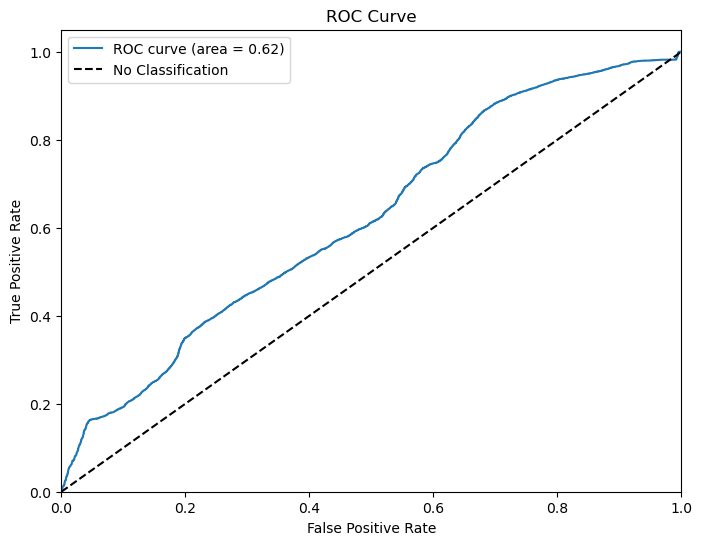

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y1_test, log_reg1.predict_proba(X1_test_scaled)[:,1]) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Classification')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Conclusion:**

1. Need to improve the model by implementing feature selection



In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Load the dataset
X = modelingInput.drop(columns=['price', 'price 2'])
y = modelingInput['price 2']
feature_index = []
features = []

# Create a logistic regression model
model = LogisticRegression()

# Use RFE to select the top 10 features
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

for num, i in enumerate(rfe.get_support(), start=0):
    if i == True:
        feature_index.append(str(num))

for num, i in enumerate(X.columns.values, start=0):
    if str(num) in feature_index:
        features.append(X.columns.values[num])

print("Features Selected: {}\n".format(len(feature_index)))
print("Features Indexes: \n{}\n".format(feature_index))
print("Feature Names: \n{}".format(features))

c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:

Features Selected: 5

Features Indexes: 
['4', '6', '7', '8', '9']

Feature Names: 
['page 1 (main category)', 'colour', 'location', 'model photography', 'page']


In [20]:
modified_X = modelingInput[['page 1 (main category)', 'colour', 'location', 'model photography', 'page']]
y = modelingInput['price 2']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test) #not fit_transform here

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test =train_test_split(modified_X, y, test_size=0.3, random_state=5)

from sklearn.linear_model import LogisticRegression
log_reg1 = LogisticRegression(random_state=5).fit(X1_train, y1_train)
log_reg1.predict(X1_train)

array([0, 0, 0, ..., 0, 1, 0])

In [21]:
print("Accuracy of logistic regression classifier on train set ", log_reg1.score(X1_train, y1_train)*100)
print("Accuracy of logistic regression classifier on test set ", log_reg1.score(X1_test, y1_test)*100)

Accuracy of logistic regression classifier on train set  55.92889640942408
Accuracy of logistic regression classifier on test set  55.83264508591343


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
y1_pred = log_reg1.predict(X1_test)
confusion_matrix1 = confusion_matrix(y1_test, y1_pred)
print(confusion_matrix1)
print(classification_report(y1_test,y1_pred))

[[13429 10584]
 [11342 14288]]
              precision    recall  f1-score   support

           0       0.54      0.56      0.55     24013
           1       0.57      0.56      0.57     25630

    accuracy                           0.56     49643
   macro avg       0.56      0.56      0.56     49643
weighted avg       0.56      0.56      0.56     49643



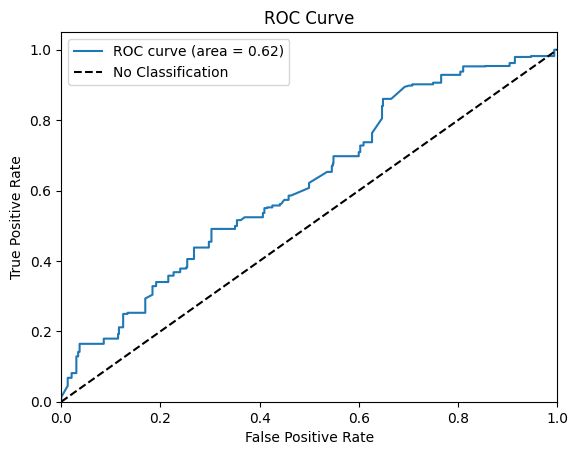

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y1_test, log_reg1.predict_proba(X1_test)[:,1]) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Classification')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Feature selection does not seem to improve the score of Logistic regression**

In [25]:
import statsmodels.api as sm

logit_model = sm.Logit(y, modified_X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.670531
         Iterations 4
                            Results: Logit
Model:                 Logit             Method:            MLE        
Dependent Variable:    price 2           Pseudo R-squared:  0.032      
Date:                  2024-08-07 11:20  AIC:               221920.9519
No. Observations:      165474            BIC:               221971.0347
Df Model:              4                 Log-Likelihood:    -1.1096e+05
Df Residuals:          165469            LL-Null:           -1.1465e+05
Converged:             1.0000            LLR p-value:       0.0000     
No. Iterations:        4.0000            Scale:             1.0000     
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
page 1 (main category)  0.3291   0.0047  69.6385 0.0000  0.3198

In [26]:
import statsmodels.api as sm

logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.669839
         Iterations 4
                             Results: Logit
Model:                Logit              Method:             MLE        
Dependent Variable:   price 2            Pseudo R-squared:   0.033      
Date:                 2024-08-07 11:21   AIC:                221701.8892
No. Observations:     165474             BIC:                221802.0549
Df Model:             9                  Log-Likelihood:     -1.1084e+05
Df Residuals:         165464             LL-Null:            -1.1465e+05
Converged:            1.0000             LLR p-value:        0.0000     
No. Iterations:       4.0000             Scale:              1.0000     
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
month                    0.0300   0.0032   9.4654 0

**Trying Linear regression on price**

In [33]:
X = modelingInput.drop(columns =['price', 'price 2'])

In [36]:
y = modelingInput['price']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(99284, 10)
(66190, 10)
(99284,)
(66190,)


In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
print(model.intercept_)

59.546693069386905


In [40]:
coeff_parameter = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_parameter

,Coefficient
month,0.187496
day,0.001148
order,-0.002515
country,-0.002548
page 1 (main category),-5.213855
page 2 (clothing model),0.033574
colour,0.040007
location,-0.473904
model photography,-3.935198
page,-0.418653


In [41]:
predictions = model.predict(X_test)
predictions

array([41.53591046, 45.5130932 , 51.25789285, ..., 40.63469481,
       45.31178496, 40.40107373])

<Axes: xlabel='price'>

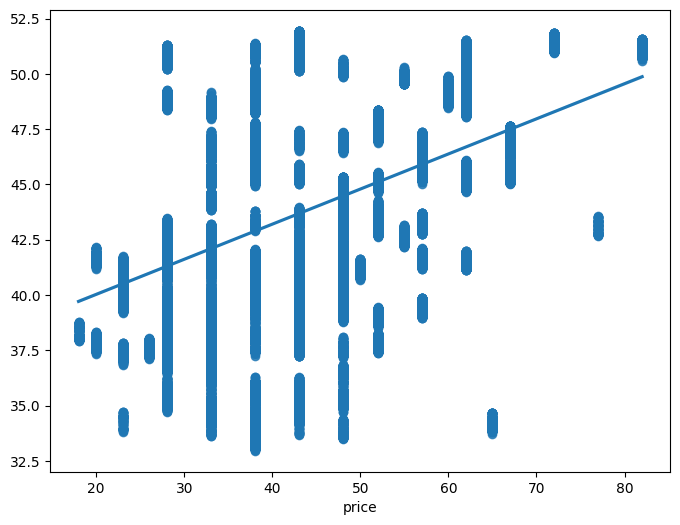

In [42]:
sns.regplot(x=y_test, y=predictions)

In [43]:
#The above graph shows our model is predicting good results. lets see Rsquare value
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)

ls=sm.OLS(y_train.astype(float),X_train_Sm.astype(float)).fit()
print(ls.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     1877.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:13:51   Log-Likelihood:            -3.8317e+05
No. Observations:               99284   AIC:                         7.664e+05
Df Residuals:                   99273   BIC:                         7.665e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

**Linear regression on price did not give expected results**

In [45]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [46]:
classifier_rf.oob_score_

0.6586156883284315

**hyperparameter tuning for Random Forest using GridSearchCV and fit the data**

In [48]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [55]:
grid_search.best_score_

np.float64(0.9999697836509407)

In [50]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

In [52]:
rf_best.feature_importances_

array([0.00172512, 0.00254908, 0.00485093, 0.00169671, 0.07708631,
       0.43845766, 0.17698859, 0.161003  , 0.04892311, 0.08671948])

In [63]:
rf_best.score

<bound method ClassifierMixin.score of RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)>

In [53]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
5,page 2 (clothing model),0.438458
6,colour,0.176989
7,location,0.161003
9,page,0.086719
4,page 1 (main category),0.077086
8,model photography,0.048923
2,order,0.004851
1,day,0.002549
0,month,0.001725
3,country,0.001697


In [58]:
predicted = rf_best.predict(X_test)
predicted

array([20, 33, 28, ..., 38, 52, 48])

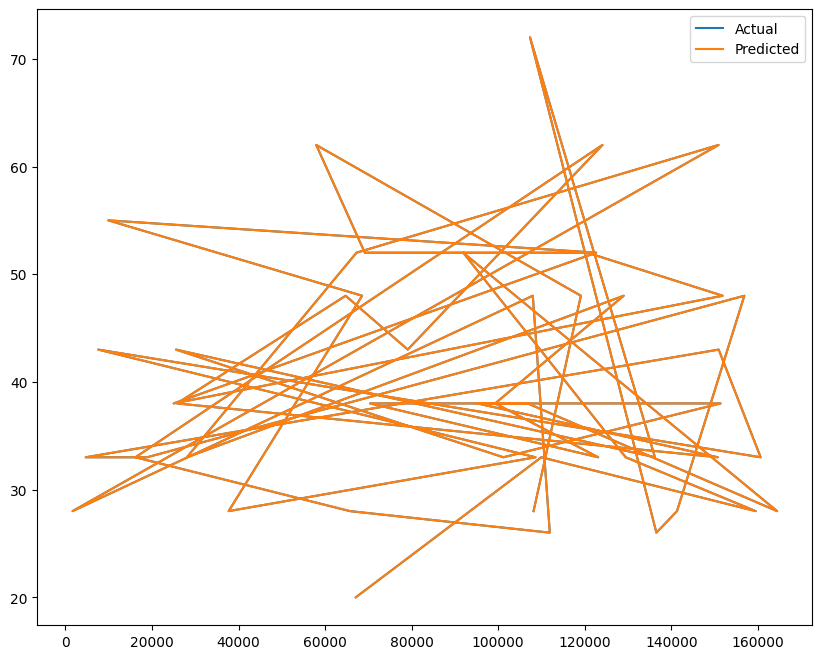

In [59]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred1" : predicted})
plt.figure(figsize=(10,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

In [60]:
from sklearn import metrics
print("R2 (explained variance):", round(metrics.r2_score(y_test, predicted), 2))
print("Mean Absolute Percentage Error:", round(np.mean(np.abs((y_test-predicted)/predicted)), 2))
print("Mean Absolute Error:", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error :", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))


R2 (explained variance): 1.0
Mean Absolute Percentage Error: 0.0
Mean Absolute Error: 0
Root Mean Squared Error : 0


**An R-squared of 100% means that all movements of a price are completely explained by movements in other variables**